## Building a machine learning text classifier

In [1]:
!pip install pandas seaborn nltk scikit-learn==1.0.2 transformers tensorflow emoji torch

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd

import nltk
import nltk.corpus
import sklearn
import sklearn.pipeline
import sklearn.feature_extraction.text
import sklearn.naive_bayes
import sklearn.model_selection
import sklearn.metrics
import tensorflow
import transformers

2022-04-27 16:32:29.913377: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib64:/usr/local/cuda/lib64
2022-04-27 16:32:29.913437: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Loading and exploring data

In [3]:
data = pd.read_csv("spam_ham_dataset.csv")

In [4]:
data.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\nthis deal is to ...,0


In [5]:
data['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

<AxesSubplot:>

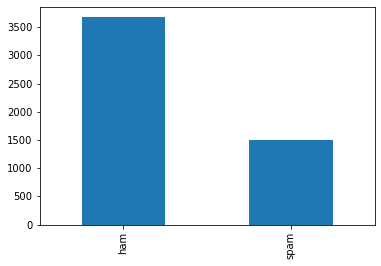

In [6]:
data['label'].value_counts().plot(kind='bar')

<AxesSubplot:>

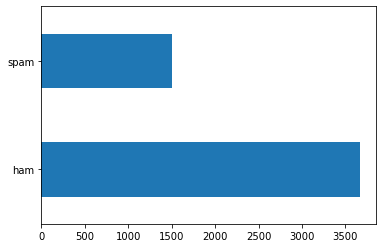

In [7]:
data['label'].value_counts().plot(kind='barh')

## Training the model pipeline

In [9]:
pipeline = sklearn.pipeline.Pipeline([
    ('vect', sklearn.feature_extraction.text.CountVectorizer()),
    ('tfidf', sklearn.feature_extraction.text.TfidfTransformer()),
    ('clf', sklearn.naive_bayes.MultinomialNB()),
])


In [10]:
# use the pipeline to classify
pipeline.fit(data['text'], data['label'])

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [15]:
emails_to_score = ['I need this report by 9am!',
                   'buy viagra pills for cheap',
                   'our next conference should be in France']
prediction = pipeline.predict(emails_to_score)

In [16]:
# print the prediction
prediction

array(['ham', 'spam', 'ham'], dtype='<U4')

In [17]:
prediction = pipeline.predict_proba(emails_to_score)

In [18]:
prediction

array([[0.95126313, 0.04873687],
       [0.04273119, 0.95726881],
       [0.87394376, 0.12605624]])

### Split the data into training and testing sets


In [19]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(data['text'], 
                                                                            data['label'], 
                                                                            test_size=0.2, 
                                                                            random_state=42)

### Train the model by fitting the pipeline to the training data

In [20]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

### Use the pipeline to predict the labels of the testing data


In [21]:
y_pred = pipeline.predict(X_test)

In [22]:
y_pred

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype='<U4')

### Score the model with the test data

In [23]:
print(pipeline.score(X_test, y_test))

0.8772946859903382


In [24]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.85      1.00      0.92       742
        spam       1.00      0.57      0.72       293

    accuracy                           0.88      1035
   macro avg       0.93      0.78      0.82      1035
weighted avg       0.90      0.88      0.87      1035



Precision: 

$\frac{\mbox{total number of correct predictions for a label}}{\mbox{number of correct and incorrect predictions for that label}}$

Recall (aka true positive rate, hit rate, sensitivity):

$\frac{\mbox{total number of correct predictions for a label}}{\mbox{number of correct + incorrect predictions for that label }}$

F1 score: 

$2*\frac{\mbox{precision * recall}}{\mbox{precision + recall}}$

In [25]:
sklearn.metrics.confusion_matrix(y_test, y_pred)

array([[742,   0],
       [127, 166]])

### Auditing the model for variations in locations

`pipeline.predict_proba` gives the probability for the labels: first number is probability it is ham, second is probability it is spam

In [26]:
pipeline.predict_proba(["test","test","train","california", 'hawaii','buy viagra'])

array([[0.68349417, 0.31650583],
       [0.68349417, 0.31650583],
       [0.67919661, 0.32080339],
       [0.77331943, 0.22668057],
       [0.70459582, 0.29540418],
       [0.22805741, 0.77194259]])

In [27]:
countries = pd.read_csv("countries.csv")

In [28]:
countries

,country
0,Afghanistan
1,Albania
2,Algeria
3,Andorra
4,Angola
...,...
188,Vietnam
189,Western Sahara
190,Yemen
191,Zambia


In [29]:
for country_name in countries['country']:

    sample_text = "Looking for a great vacation destination? Come to the nation of " + country_name + "!"
    probability = pipeline.predict_proba([sample_text])[0][1]
    print(country_name, round(probability,3))
    
    

Afghanistan 0.199
Albania 0.198
Algeria 0.167
Andorra 0.167
Angola 0.204
Antigua and Barbuda 0.16
Argentina 0.202
Armenia 0.209
Austria 0.2
Azerbaijan 0.204
Bahrain 0.167
Bangladesh 0.205
Barbados 0.206
Belarus 0.167
Belgium 0.203
Belize 0.32
Benin 0.216
Bhutan 0.199
Bolivia 0.204
Bosnia and Herzegovina 0.16
Botswana 0.199
Brazil 0.212
Brunei 0.202
Bulgaria 0.197
Burkina Faso 0.167
Burundi 0.21
Cabo Verde 0.195
Cambodia 0.205
Cameroon 0.167
Canada 0.205
Central African Republic 0.149
Chad 0.12
Channel Islands 0.152
Chile 0.204
China 0.249
Colombia 0.167
Comoros 0.167
Congo 0.199
Costa Rica 0.239
Côte d'Ivoire 0.214
Croatia 0.151
Cuba 0.216
Cyprus 0.2
Czech Republic 0.211
Denmark 0.198
Djibouti 0.167
Dominica 0.196
Dominican Republic 0.176
DR Congo 0.252
Ecuador 0.199
Egypt 0.209
El Salvador 0.137
Equatorial Guinea 0.167
Eritrea 0.198
Estonia 0.197
Eswatini 0.167
Ethiopia 0.167
Faeroe Islands 0.191
Finland 0.205
France 0.202
French Guiana 0.238
Gabon 0.167
Gambia 0.204
Georgia 0.19
Germ

In [30]:
results_list = []
for country_name in countries['country']:

    sample_text = "Hello, good sirs! I am a student from " + country_name + " and am interested in an internship."
    probability = pipeline.predict_proba([sample_text])[0][1]
    
    result = {'country':country_name,
              'spam_prediction':probability}
    
    results_list.append(result)
    
    

In [31]:
country_spam_data = pd.DataFrame(results_list)
country_spam_data

,country,spam_prediction
0,Afghanistan,0.212994
1,Albania,0.211911
2,Algeria,0.185219
3,Andorra,0.185219
4,Angola,0.217462
...,...,...
188,Vietnam,0.216887
189,Western Sahara,0.237726
190,Yemen,0.221328
191,Zambia,0.185219


In [32]:
country_spam_data.sort_values('spam_prediction')

,country,spam_prediction
31,Chad,0.136679
51,El Salvador,0.150503
30,Central African Republic,0.161749
40,Croatia,0.165880
32,Channel Islands,0.166231
...,...,...
123,Netherlands,0.266945
182,United Arab Emirates,0.278544
76,Hong Kong,0.278699
84,Isle of Man,0.287800


In [33]:
pipeline.predict_proba([sample_text])[0][1]

0.24402994601464398